# Image processing - Practice2.Intensity transformation

Made by Prof. Hwan-ho Cho.

Department of Electronics Engineering, Incheon National University

hwanho@inu.ac.kr

---


# 1. Image load & visualization

1) 필요한 Libary load

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

2) 이미지 로드

* 미리 github에 올려놓은 이미지 파일 활용





In [ ]:
image = imread('https://github.com/Hwan-ho/ImageProcPractice/raw/main/Dataset/imdata/lena_gray.jpeg')

In [ ]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')

# 2. Contrast stretching

1) 원본 이미지와 같은 크기의 0 이미지 생성

In [ ]:
image2 = np.zeros(image.shape)

2) 파라미터 setting (s1 < r1 < r2 < s2)

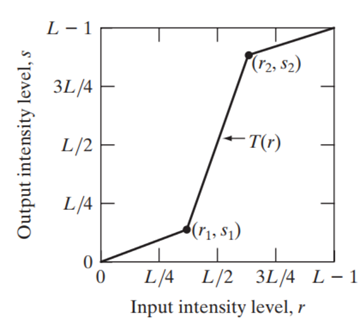

In [ ]:
r1 = 100
s1 = 0
r2 = 101
s2 = 255

3) 구간별 T(r) setting
$$
T(r) =
\begin{cases}
{{s_1}\over{r_1}}⋅{r}\text{,} & \text{if }(r<r_1) \\
{{s_2 - s_1}\over{r_2 - r_1}}⋅{(r-r_1) + s_1}\text{,} & \text{if }(r_1<r<r_2) \\
{{255 - s_2}\over{255 - r_2}}⋅{(r-r_2) + s_2}\text{,} & \text{if }(r_2<r )\\
\end{cases}
$$

In [ ]:
T1 = lambda r: (s1/r1)*r
T2 = lambda r: (s2-s1)/(r2-r1)*(r-r1)+s1
T3 = lambda r: (255-s2)/(255-r2)*(r-r2)+s2

4) T(r) 적용

In [ ]:
a = np.array([1,2,3,4,5])
a[a < 3] = 0
a

In [ ]:
image2[image<r1] = T1(image[image<r1])
image2[(image>=r1) & (image<=r2)] = T2(image[(image>=r1) & (image<=r2)])
image2[image>r2] = T3(image[image>r2])

In [ ]:
plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(image2, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Transformed')

# 3. Intensity-level slicing

1) Intensity 100~150인 부분만 남기고 나머지는 지우기

In [ ]:
image3 = image.copy() # to avoid shallow copy

image3[(image3 > 150) | (image3 < 100)] = 0

2) Result visualization

In [ ]:
plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(image3, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Transformed')

3) 65~75 사이 intensity 2배로 만들기 (직접 해보기)

In [ ]:
myImage = image.copy()

myImage[(myImage > 65) & (myImage < 75)] = myImage[(myImage > 65) & (myImage < 75)]*2

plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(myImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Transformed')

# 4. Bit-Plane slicing

1) 각 bit plane image 확인

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

i = 0
while i < 8:
  plt.subplot(3,3,i+2)
  plt.imshow(image&(1<<i), cmap='gray') 
  plt.axis('off')
  plt.title(f'Bit plane {i+1}')
  i += 1

2) Bit plane을 8~1까지 누적시켜가면서 그려보기

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

image4 = np.zeros(image.shape)
i = 7
while i >= 0:
  image4 += image&(1<<i)
  plt.subplot(3,3,7-i+2)
  plt.imshow(image4, cmap='gray', vmin=0, vmax=255 )
  plt.axis('off')
  plt.title(f'Bit plane 8 ~ {i+1}')
  i -= 1

3) Bit plane을 1~8까지 누적시켜가며 그려보기

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255) # vmin, vmax = dynamic range
plt.axis('off')
plt.title('Original')

image4 = np.zeros(image.shape)
i = 0
while i < 8:
  image4 += image&(1<<i)
  plt.subplot(3,3,i+2)
  plt.imshow(image4, cmap='gray')#, vmin=0, vmax=255 )
  plt.axis('off')
  plt.title(f'Bit plane 1 ~ {i+1}')
  i += 1

4) 연습문제

원본 이미지와 Bit plane 1~5 를 제외한 이미지를 그려 비교하시오.

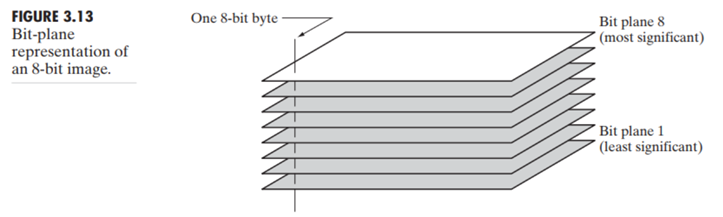

In [ ]:
myImage = (image >> 5) << 5

plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(myImage, cmap='gray',vmin=0, vmax=255) 
plt.axis('off')
plt.title('Bit Plane eliminated')